# EDA

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Function for visualizaiton

In [2]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    if rotation == True:
        plt.xticks(rotation=rotation_value)
    plt.show()

### Importing files as DataFrames

In [3]:
store_data = pd.read_csv('../input/AppleStore.csv')
app_desc = pd.read_csv('../input/appleStore_description.csv')

In [4]:
store_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [6]:
app_desc.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


## Top 10 apps on the basis of total rating
**total rating** is a rough indicator of **number of downloads** so we will treat total rating count as a target variable in place of number of downloads. As, more number of rating suggests more users.

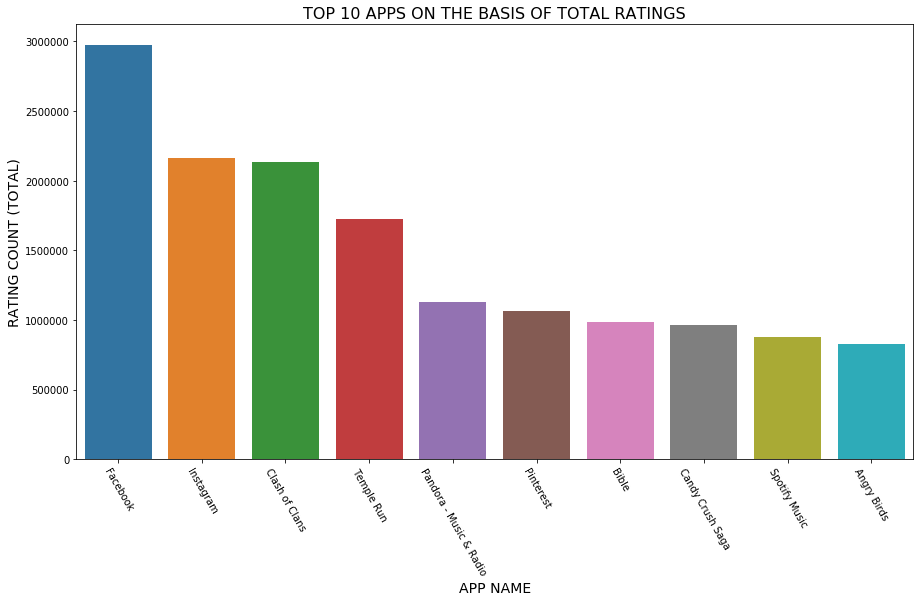

In [7]:
store_data_sorted = store_data.sort_values('rating_count_tot', ascending=False)
subset_store_data_sorted = store_data_sorted[:10]

visualizer(subset_store_data_sorted.track_name, subset_store_data_sorted.rating_count_tot, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
          "APP NAME", "RATING COUNT (TOTAL)", True, -60)

## Top 10 apps on the basis of download size

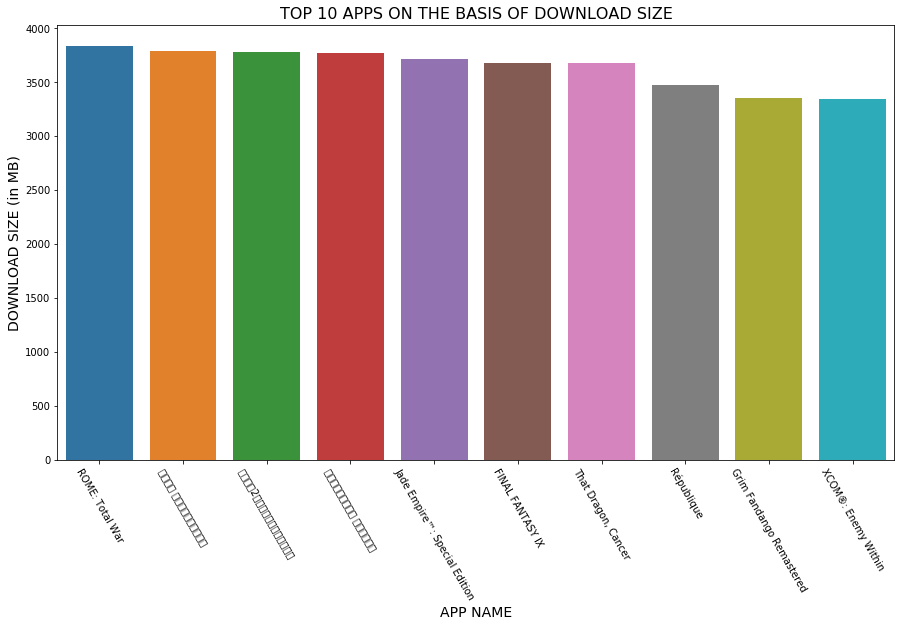

In [8]:
store_data_download = store_data.sort_values('size_bytes', ascending=False)
store_data_download.size_bytes /= 1024*1024 #Conversion from Bytes to MegaBytes
subset_store_data_download = store_data_download[:10]

visualizer(subset_store_data_download.track_name, subset_store_data_download.size_bytes, "bar", "TOP 10 APPS ON THE BASIS OF DOWNLOAD SIZE",
          "APP NAME", "DOWNLOAD SIZE (in MB)", True, -60)

## Top 10 apps on the basis of price

App store only features app in USD currency (in this dataset)

In [9]:
store_data.currency.unique()

array(['USD'], dtype=object)

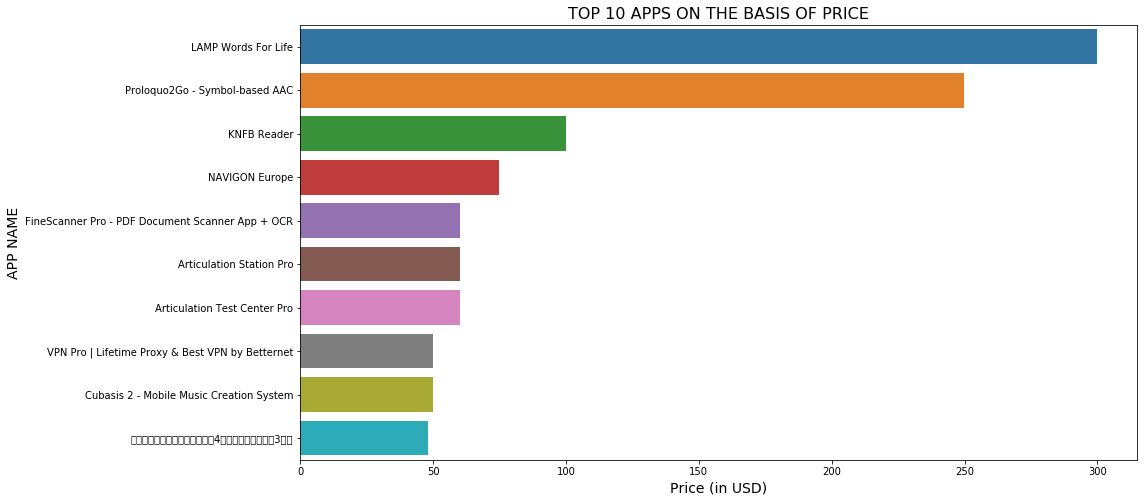

In [10]:
store_data_price = store_data.sort_values('price', ascending=False)
subset_store_data_price = store_data_price[:10]

visualizer(subset_store_data_price.price, subset_store_data_price.track_name, "bar", "TOP 10 APPS ON THE BASIS OF PRICE",
          "Price (in USD)", "APP NAME")

### Linear Correlation of Attributes

**lang.num** (number of languages app support) shows the highest correlation with the **rating_count_tot**(total rating count). 

In [11]:
corr_store_data = store_data.corr()
corr_store_data["rating_count_tot"].sort_values(ascending=False)

rating_count_tot    1.000000
rating_count_ver    0.163645
lang.num            0.137675
user_rating_ver     0.088744
user_rating         0.083310
ipadSc_urls.num     0.015734
sup_devices.num     0.008832
size_bytes          0.004486
vpp_lic            -0.000982
price              -0.039044
Unnamed: 0         -0.168640
id                 -0.201976
Name: rating_count_tot, dtype: float64

## Inspecting linear correlation of Number of languages and Rating Count (Total)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


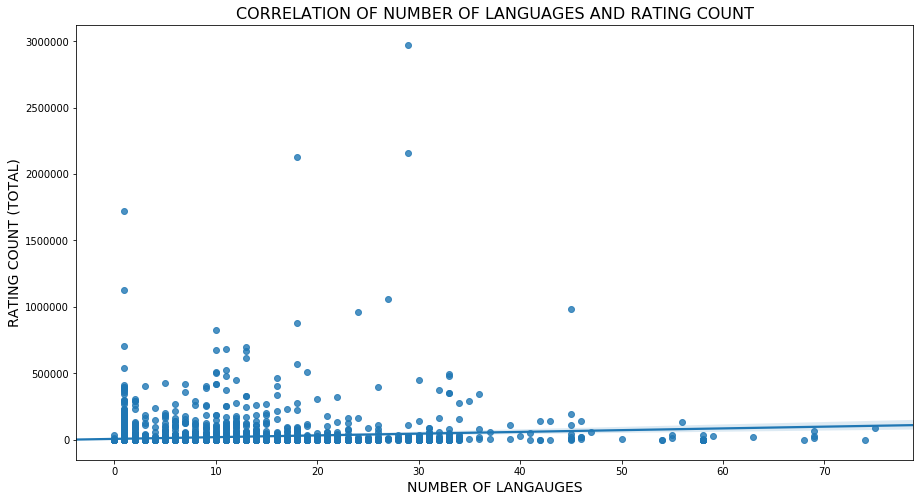

In [12]:
visualizer(store_data["lang.num"], store_data.rating_count_tot, "reg", 
          "CORRELATION OF NUMBER OF LANGUAGES AND RATING COUNT", "NUMBER OF LANGAUGES",
          "RATING COUNT (TOTAL)", False)

# FEATURE ENGINEERING AND PREPARATION OF DATA

## Best in Business
Here are the apps that have best tentative revenue.

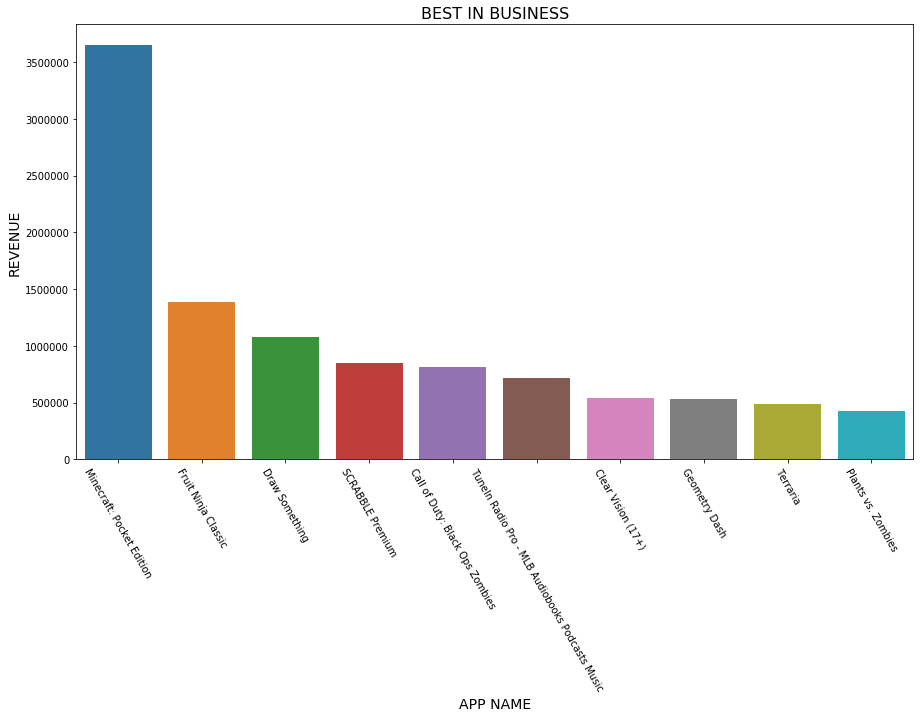

In [13]:
store_data['revenue'] = store_data.rating_count_tot * store_data.price
store_data_business = store_data.sort_values("revenue", ascending=False)
subset_store_data_business = store_data_business[:10]

visualizer(subset_store_data_business.track_name, subset_store_data_business['revenue'], "bar", "BEST IN BUSINESS",
         "APP NAME", "REVENUE", True, -60)

## User Ratings on the App Store
Here is the count plot of the user ratings on Apple App store we see lots of apps are rated 0

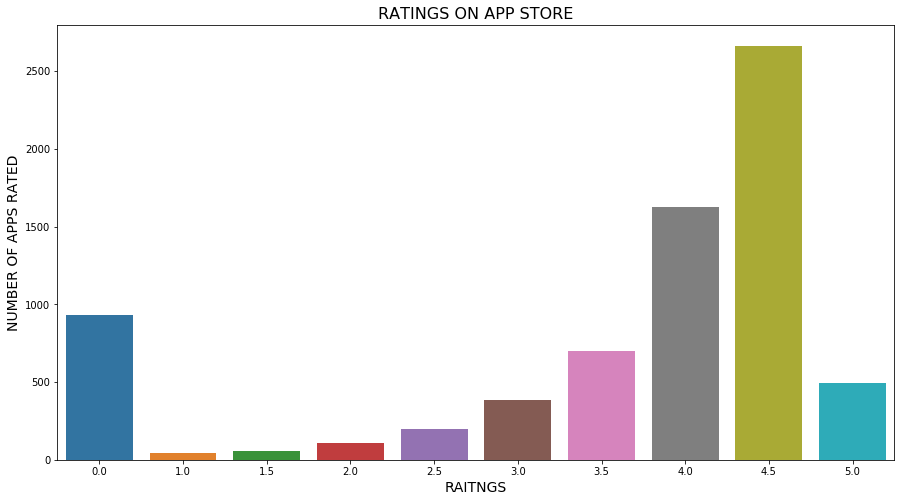

In [14]:
visualizer(store_data.user_rating, None, "count","RATINGS ON APP STORE",
         "RAITNGS", "NUMBER OF APPS RATED")

## User favourites
**rating_count_tot * user_rating** can tell user favourites and **rating_count_ver * user_rating_ver** will tell us the favourites in current version

In [15]:
store_data["favourites_tot"] = store_data["rating_count_tot"] * store_data["user_rating"]
store_data["favourites_ver"] = store_data["rating_count_ver"] * store_data["user_rating_ver"]

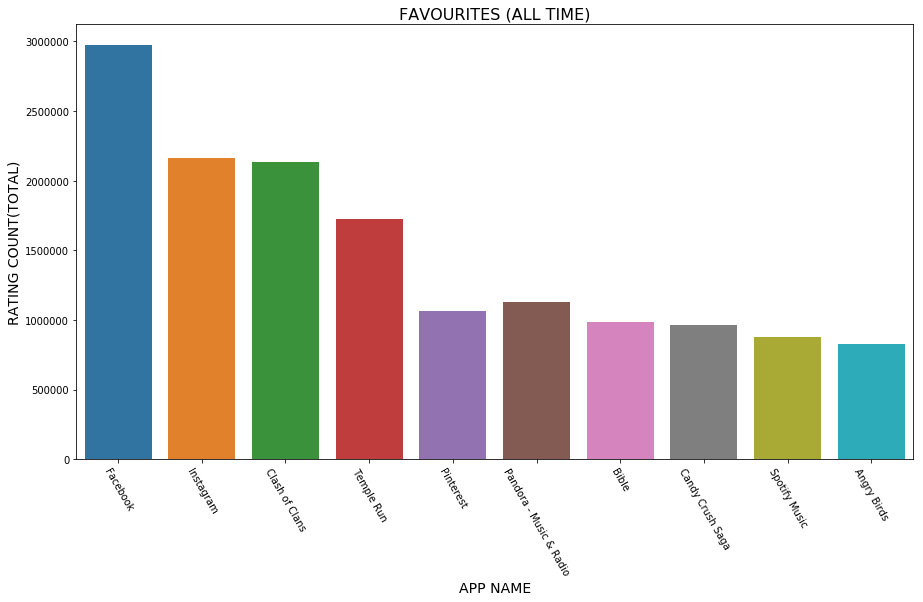

In [16]:
favourite_app = store_data.sort_values("favourites_tot", ascending=False)
favourite_app_subset = favourite_app[:10]

visualizer(favourite_app_subset.track_name, favourite_app_subset.rating_count_tot, "bar", "FAVOURITES (ALL TIME)",
         "APP NAME",  "RATING COUNT(TOTAL)", True, -60)

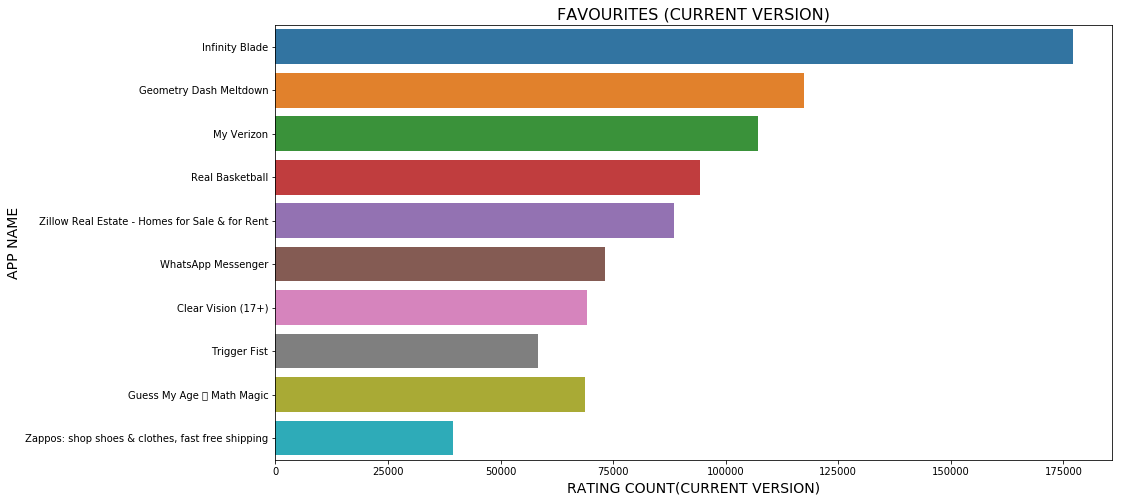

In [17]:
favourite_app_ver = store_data.sort_values("favourites_ver", ascending=False)
favourite_app_ver_subset = favourite_app_ver[:10]

visualizer(favourite_app_ver_subset.rating_count_ver,favourite_app_ver_subset.track_name,
           "bar", "FAVOURITES (CURRENT VERSION)","RATING COUNT(CURRENT VERSION)","APP NAME", False)


## App Distribution by content rating
These are bar graphs representing distribution of apps according to content rating.
A major share of apps are rated 4+.

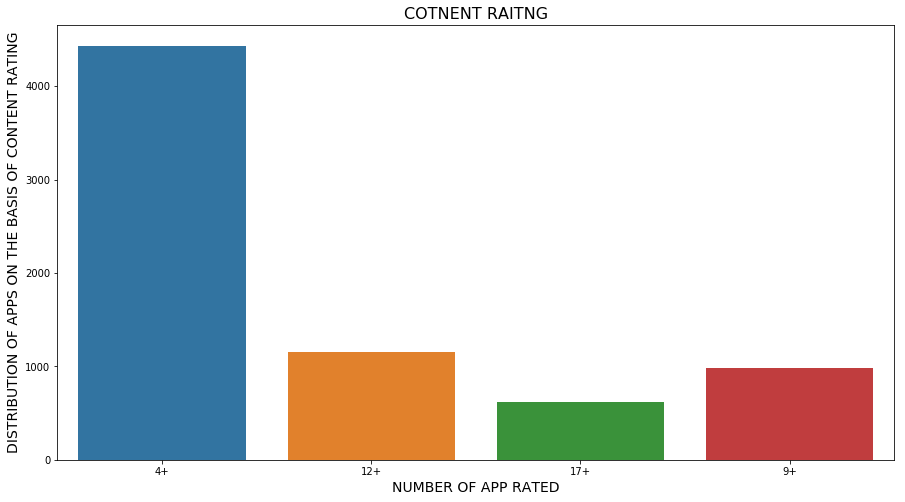

In [18]:
visualizer(store_data.cont_rating, None, "count", "COTNENT RAITNG", "NUMBER OF APP RATED",
           "DISTRIBUTION OF APPS ON THE BASIS OF CONTENT RATING", False)

## Adding length of app description as a column

Taking assumption **if developer explains about the app in a detailed way then it is more likely to hit more user count**, so I added length of app description as a possible indicator for number of downloads

In [19]:
app_desc["desc_len"] = app_desc["app_desc"].apply(lambda x: len(x))
store_data["desc_len"] = app_desc["desc_len"]
store_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,revenue,favourites_tot,favourites_ver,desc_len
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,84955.08,85168.0,117.0,1533
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0.00,644260.0,91.0,3952
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0.00,660040.5,12699.0,2090
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0.00,1048964.0,2920.5,3997
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0.00,4436640.0,26600.0,2998


## Splitting Training and Testing Set

In [20]:
from sklearn.model_selection import train_test_split
store_train, store_test = train_test_split(store_data, test_size=0.2)

store_data = store_train
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5757 entries, 2722 to 3202
Data columns (total 21 columns):
Unnamed: 0          5757 non-null int64
id                  5757 non-null int64
track_name          5757 non-null object
size_bytes          5757 non-null int64
currency            5757 non-null object
price               5757 non-null float64
rating_count_tot    5757 non-null int64
rating_count_ver    5757 non-null int64
user_rating         5757 non-null float64
user_rating_ver     5757 non-null float64
ver                 5757 non-null object
cont_rating         5757 non-null object
prime_genre         5757 non-null object
sup_devices.num     5757 non-null int64
ipadSc_urls.num     5757 non-null int64
lang.num            5757 non-null int64
vpp_lic             5757 non-null int64
revenue             5757 non-null float64
favourites_tot      5757 non-null float64
favourites_ver      5757 non-null float64
desc_len            5757 non-null int64
dtypes: float64(6), int64(10), ob

## Custom Transformations

### Dropper

Drops columns that are unnecessary for analysis or won't help much in prediction of total rating count.  

**Currency: **Has consistent value (USD) throughout the dataset  
**Rating Count Total, Rating Count Version: **Target variables  
**Unnamed 0, vpp_lic: **Index, not useful for prediction  
**Revenue, Favourites Total, Favourites Version: **Derived variables from target variable  

### Version Trimmer

Trims version to just one digit.   
For example: Version 3.1.4 will be trimmed to version 3, because 3.1.4 is not a valid float value

### Dataframe Selector

Helps scikit-learn to work with dataframes, it selects the values from only the columns passed as arguments.  
I have taken it directly from** Hands on Machine Learning with Scikit-learn and Tensorflow by Aurélien Géron**.

### Dual Encoder 

Encodes **cont_rating** and **prime_genre** and also has a data member for containing encoders such that we can reference to them in future.  
I could've just used Label Encoder, but this step helps me encode two columns in one go.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

#Drops unncessary columns
class dropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        pass
    def fit_transform(self, X, y=None):
        X = pd.DataFrame(X)
        return X.drop(["currency", "rating_count_tot", "rating_count_ver","track_name",
                                       "Unnamed: 0", "vpp_lic", "revenue", 
                                      "favourites_tot", "favourites_ver"], axis=1)

#Trims version number and changes to int   
def ver_cleaner(data):
    try:
        if "V3" in data: #To handle a single exception
                return str(3)
        else:   
             return int(data.split(".")[0])
    except:
        return int(0)

class version_trimmer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        pass
    def fit_transform(self, X, y=None):
        X["ver"] = X["ver"].apply(ver_cleaner)
        return X

#Helps with dataframes (from hands on ML)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

#Dual label encoder
class dual_encoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self):
        return self
    def transform(self):
        pass
    def fit_transform(self, X, y=None):
        self.encoder_cont = LabelEncoder()
        cont_encoded = self.encoder_cont.fit_transform(X['cont_rating'])
        
        self.encoder_prime_genre = LabelEncoder()
        genre_encoded = self.encoder_prime_genre.fit_transform(X['prime_genre'])
        
        X["cont_encoded"] = cont_encoded
        X["genre_encoded"] = genre_encoded
        
        return X.drop(["cont_rating", "prime_genre"], axis=1)
    

## Pipelines

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelEncoder, StandardScaler

category_attributes = ["cont_rating","prime_genre"]
numerical_attributes = store_data.drop(["cont_rating","prime_genre"], axis=1).columns

numline = Pipeline([("dataframe", DataFrameSelector(numerical_attributes)),
                    ("dropper", dropper()),
                    ("version-trimmer", version_trimmer()),
                   ("scaling",StandardScaler())])

encoder = dual_encoder()

catline = Pipeline([("dataframe", DataFrameSelector(category_attributes)),
                    ("cat-encoder", encoder)])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", numline),
                                               ("cat_pipeline", catline)])

store_data_prepared = full_pipeline.fit_transform(store_data)

store_data_prepared    

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:459: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

(5757, 12)

In [32]:
#Encoders
cont_codes = encoder.encoder_cont.classes_
genre_codes = encoder.encoder_prime_genre.classes_

In [33]:
store_data_prepared.shape

(5757, 12)

In [34]:
y = np.c_[store_data["rating_count_tot"]] #labels
X = store_data_prepared #Attributes

# TRYING MACHINE LEARNING ALGORITHMS

In [35]:
from sklearn.model_selection import cross_val_score

#Scoring ML model(Using Negative root mean squared error) made easy
def model_scoring(model_name, model, X, y):
    
    #Cross Validation
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    
    #Scores
    rmse = np.sqrt(-scores)
    mean = rmse.mean()
    std = rmse.std()
    print(model_name)
    print()
    print("RMSE: {}".format(rmse))
    print("MEAN: {}".format(mean))
    print("STD: {}".format(std))

## Linear Regression

In [36]:
# Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg = lin_reg.fit(X, y)

# Scores
model_scoring("Linear Regression", lin_reg, X, y)

Linear Regression

RMSE: [ 44501.2580306  101049.4073692   46283.25727261  59577.22544639
 147674.02387944  74697.57541255  40866.06561862  54058.25387586
 106648.88456684  34802.30271382]
MEAN: 71015.82541859368
STD: 34663.115669009305


## Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()

poly_reg = poly_reg.fit(x_poly, y)

# Scores
model_scoring("Polynomial Regression", poly_reg, x_poly, y)

Polynomial Regression

RMSE: [ 47210.04566387 108420.25798327  50196.41620626  75678.35236201
 237917.37293778  74452.77174444 146748.40982906 502841.33929091
 116152.44272969  53040.8781985 ]
MEAN: 141265.8286945781
STD: 132479.21156418454


## Support Vector Regression

In [44]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")

y_ravel = y.ravel()

svr = svr.fit(X, y_ravel)

# Scores
model_scoring("Support Vector Regression", svr, X, y_ravel)

Support Vector Regression

RMSE: [ 48187.02485791 103788.42479164  48291.20954026  63675.95689437
 150010.13279876  79242.69402237  42559.39898366  58385.21378592
 111218.64297823  34446.89894222]
MEAN: 73980.5597595335
STD: 35083.07026028292


## Decision Tree Regression

In [40]:
# Model
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()

dec_tree = dec_tree.fit(X, y)

# Scores
model_scoring("Decision Tree Regression", dec_tree, X, y)

Decision Tree Regression

RMSE: [163016.35205053 110987.39531585  59305.56434641 110558.51253999
 146433.57699299 101759.87343966  95835.08814122  70359.12298991
 114912.27543552 119909.88086734]
MEAN: 109307.76421194212
STD: 29439.496663455837


Hey there, this is my first full analysis with machine learning.   
I found inpiration for this from** Hands on Machine Learning with Scikit-learn and Tensorflow by Aurélien Géron**.   
Some postive criticism will be nice in comments.